# Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#upload file
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#check datatype of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis

In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

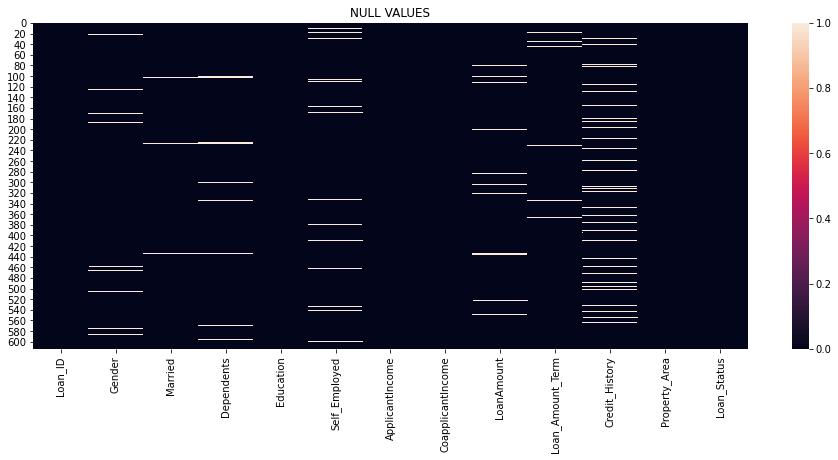

In [8]:
# Checking null values in the dataframe
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

In [9]:
#checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Replacing NaN values in numerical and object columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())


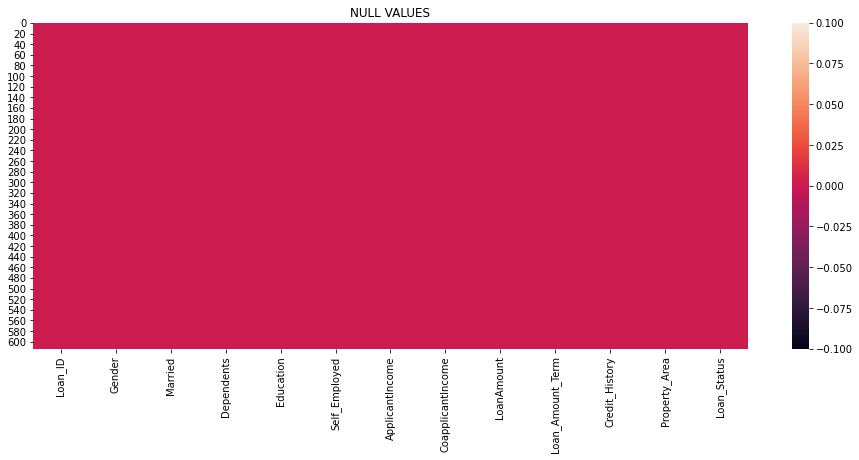

In [11]:
# Checking null values in the dataframe
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

In [12]:
#all features are without null
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
#Loan_ID is not important so we will drop it
df.drop(['Loan_ID'],axis=1,inplace=True)

In [15]:
# description of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


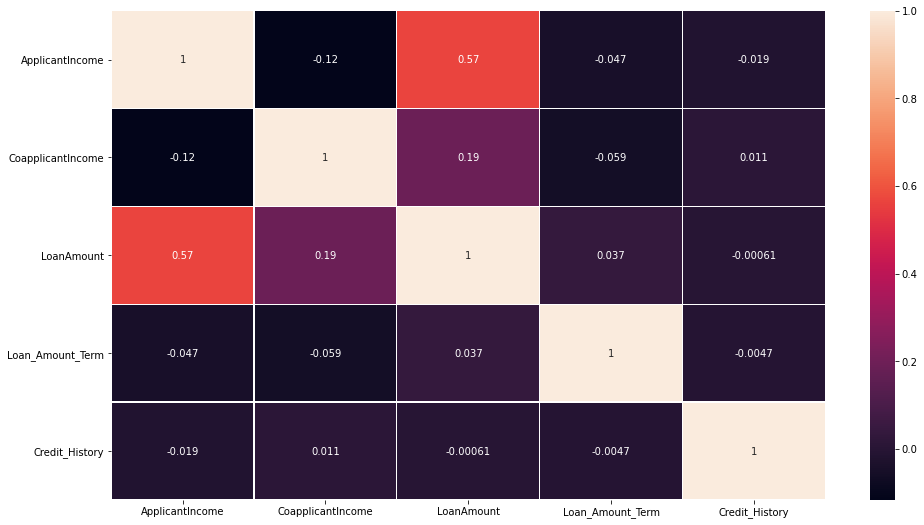

In [16]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

ApplicantIncome         AxesSubplot(0.125,0.536818;0.227941x0.343182)
CoapplicantIncome    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
LoanAmount           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Loan_Amount_Term           AxesSubplot(0.125,0.125;0.227941x0.343182)
Credit_History          AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

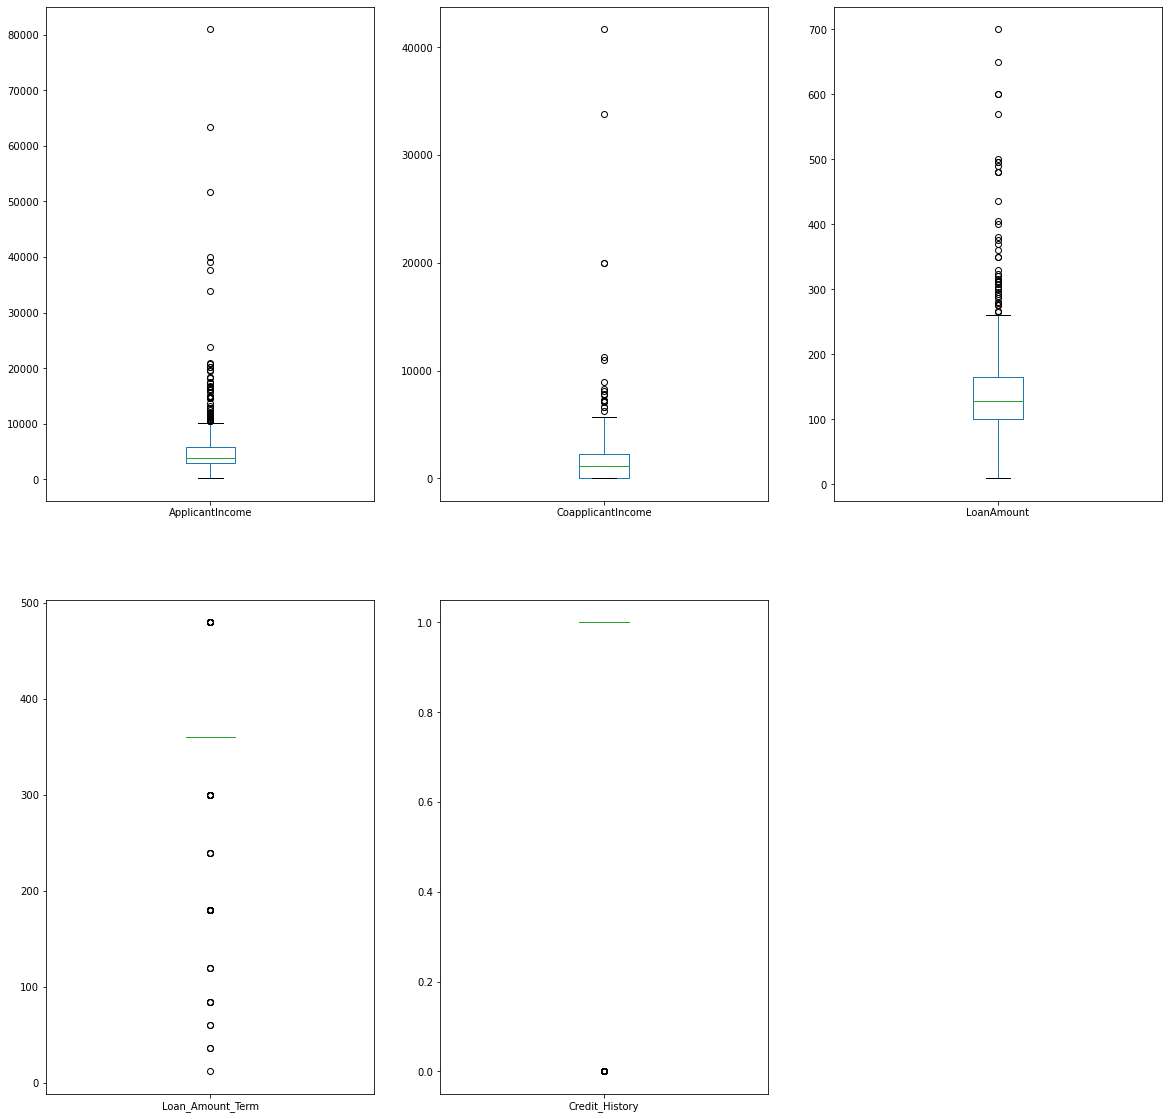

In [17]:
#check outliers with Boxplot
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(20,20))

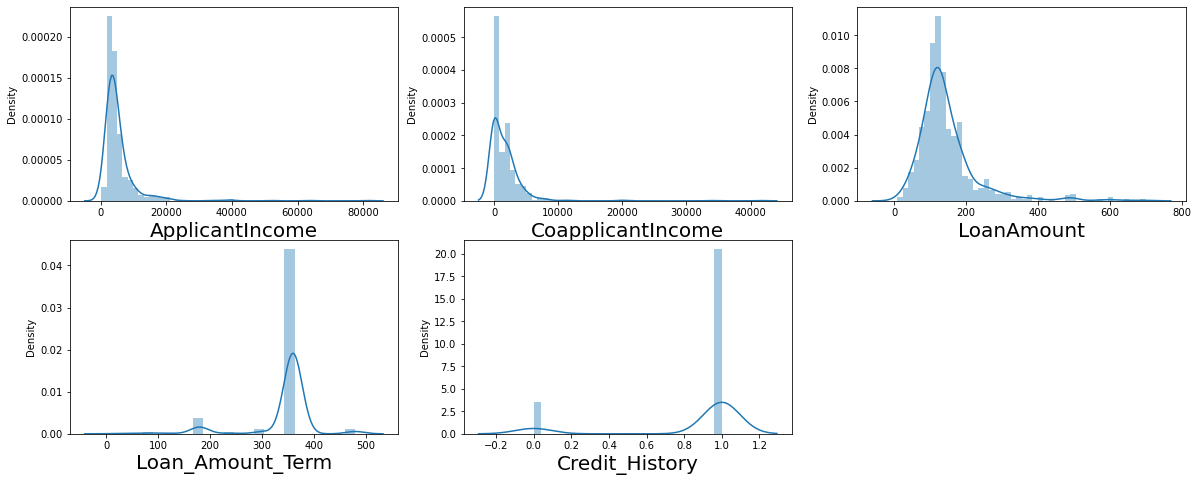

In [18]:
features=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df[features]:
    if plotnumber<=5:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can observe outliers are present in these feature 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'

In [19]:
#LabelEncoding for catagoricle data
from sklearn.preprocessing import LabelEncoder
feature=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']
le=LabelEncoder()
df[feature]= df[feature].apply(le.fit_transform)

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [21]:
#check skewness in feature
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Removing outliers

In [22]:
# removing outliers by Zscore
from scipy.stats import zscore
z=np.abs(zscore(df[features]))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [23]:
df.shape

(614, 12)

In [24]:
df_new.shape

(577, 12)

In [25]:
# Let's check the the data loss
data_loss = (614-577)/614*100
data_loss

6.026058631921824

6% data loss 

# IQR method

In [30]:
features1=df[features]
# 1st quantile
Q1=features1.quantile(0.25)
# 3rd quantile
Q3=features1.quantile(0.75)
# IQR
IQR=Q3 - Q1
df_1=df[~((df < (Q1 - 4* IQR)) |(df > (Q3 + 4 * IQR))).any(axis=1)]

In [31]:
#Checking shape of new dataset
df_1.shape

(436, 12)

In [33]:
# Let's check the the data loss
data_loss = (614-436)/614*100
data_loss

28.990228013029316

Too much data loss with IQR so we will go with zscore

In [34]:
#still skewness is present will removing skewness using yeo-johnson
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

still skewness is present will removing skewness using yeo-johnson

In [35]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
#Removing skewness using yeo-johnson
df_new[features] = scaler.fit_transform(df_new[features].values)

In [36]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Skewness reduced from some feature but many features having skewness will keep as it is

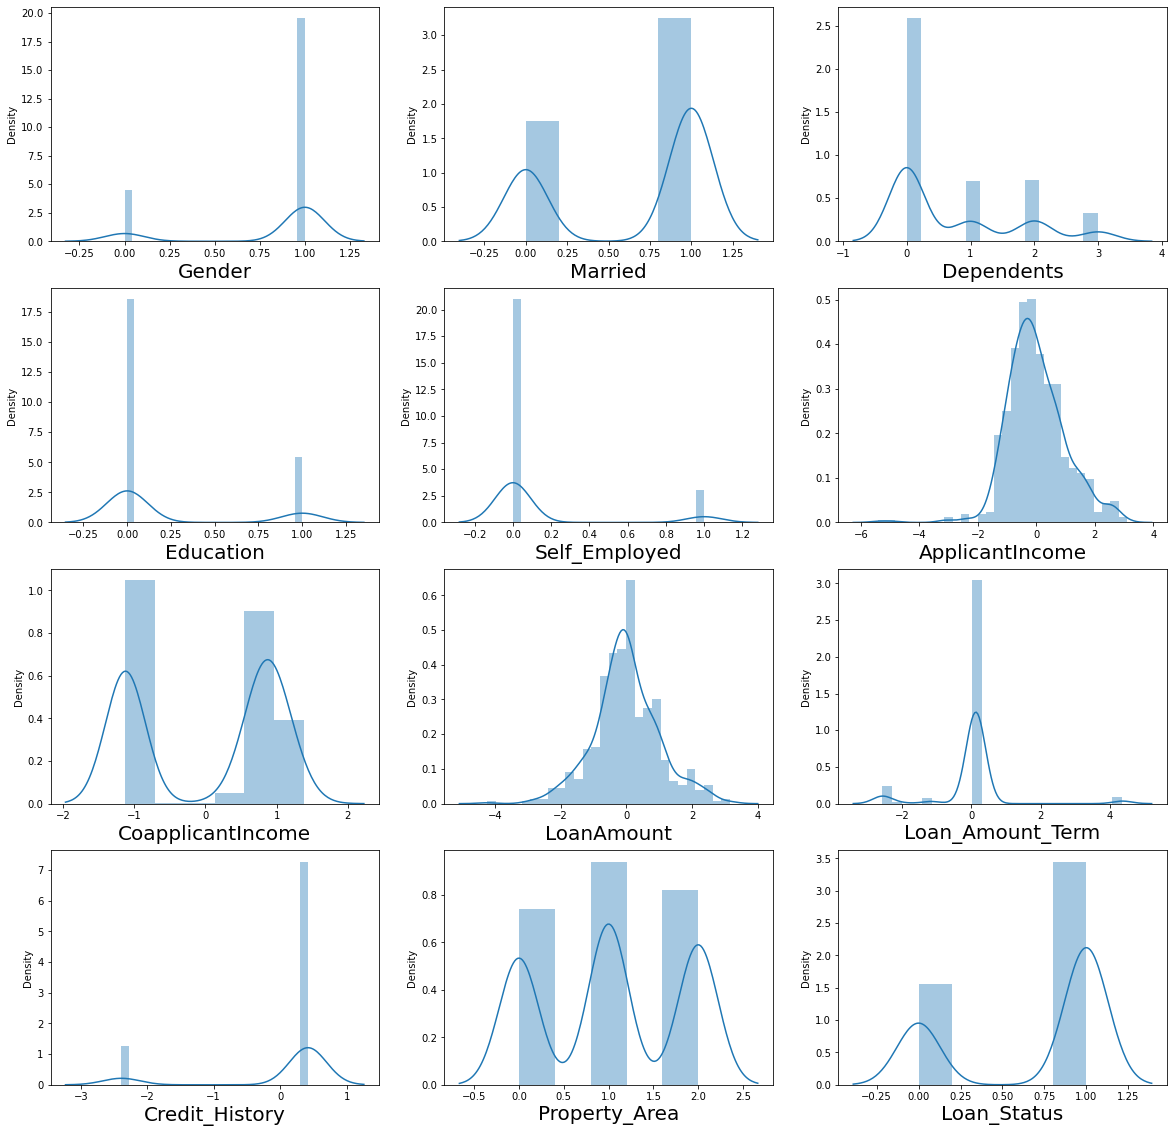

In [37]:
#check visually with distplot for skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new.columns:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Model Preparation

In [38]:
#separating output feature
x = df_new.drop("Loan_Status",axis=1)
y = df_new["Loan_Status"]

# Standard scaler

In [39]:
#StandardScaler standardizes a feature using standard deviation
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.221468,Gender
1,1.417863,Married
2,1.168337,Dependents
3,1.066385,Education
4,1.053471,Self_Employed
5,1.762537,ApplicantIncome
6,1.589249,CoapplicantIncome
7,1.550704,LoanAmount
8,1.047408,Loan_Amount_Term
9,1.008880,Credit_History


multicolinearity issue is not present Since all the VIF features is less

In [41]:
#lets check the value counts of the target variable
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

This is a binary-class classification problem. We can see, there is a problem of imbalance. we will go for oversampling using SMOTE

# SMOTE

In [42]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_1,y_1 = SM.fit_resample(x,y)

In [43]:
y_1.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [44]:
#importing all the required libraries to find best Algorithm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings("ignore")

In [45]:
#model with DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
#Import required accuracy metrics for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

max_accu = 0
max_rs = 0
for i in range(100,200):
    x_train,x_test,y_train,y_test = train_test_split(x_1,y_1,test_size = 0.25, random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8341708542713567 on Random State 111


In [46]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_1,y_1, test_size = 0.25, random_state = max_rs )

# Decision Tree Classifier

In [47]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 82.41206030150754%
---------------------------------------------------
Confusion Matrix : 
 [[85 15]
 [20 79]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.84      0.80      0.82        99

    accuracy                           0.82       199
   macro avg       0.82      0.82      0.82       199
weighted avg       0.82      0.82      0.82       199



# Random Forest Classifier

In [48]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 84.92462311557789%
---------------------------------------------------
Confusion Matrix : 
 [[82 18]
 [12 87]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       100
           1       0.83      0.88      0.85        99

    accuracy                           0.85       199
   macro avg       0.85      0.85      0.85       199
weighted avg       0.85      0.85      0.85       199



# KNNeighbors Classifier

In [49]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_knn)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_knn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_knn)}")

Accuracy Score: 78.39195979899498%
---------------------------------------------------
Confusion Matrix : 
 [[77 23]
 [20 79]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       100
           1       0.77      0.80      0.79        99

    accuracy                           0.78       199
   macro avg       0.78      0.78      0.78       199
weighted avg       0.78      0.78      0.78       199



# Support Vector Classifier

In [50]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_svc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_svc)}")

Accuracy Score: 77.38693467336684%
---------------------------------------------------
Confusion Matrix : 
 [[67 33]
 [12 87]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      0.67      0.75       100
           1       0.72      0.88      0.79        99

    accuracy                           0.77       199
   macro avg       0.79      0.77      0.77       199
weighted avg       0.79      0.77      0.77       199



# XGBClassifier

In [51]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

[19:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------------------
Accuracy Score: 81.90954773869346%
------------------------------------------------------
Confusion Matrix : 
 [[80 20]
 [16 83]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       100
           1       0.81      0.84      0.82        99

    accuracy                           0.82       199
   macro avg       0.82      0.82      0.82       199
weighted avg       0.82      0.82      0.82       199



# ExtraTreesClassifier

In [52]:
#lets check with ExtraTreesClassifier model
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
pred_et = et.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_et)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_et)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_et)}")

-------------------------------------------------------
Accuracy Score: 85.92964824120602%
------------------------------------------------------
Confusion Matrix : 
 [[83 17]
 [11 88]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       100
           1       0.84      0.89      0.86        99

    accuracy                           0.86       199
   macro avg       0.86      0.86      0.86       199
weighted avg       0.86      0.86      0.86       199



# LogisticRegression

In [53]:
#lets check with LogisticRegression model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_lg)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_lg)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_lg)}")

-------------------------------------------------------
Accuracy Score: 79.39698492462311%
------------------------------------------------------
Confusion Matrix : 
 [[63 37]
 [ 4 95]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.94      0.63      0.75       100
           1       0.72      0.96      0.82        99

    accuracy                           0.79       199
   macro avg       0.83      0.79      0.79       199
weighted avg       0.83      0.79      0.79       199



here ExtraTrees classifier is giving best score so we will for hyper parameter checking of ExtraTrees classifier

# Hyper-parameter tuning
ExtraTreesClassifier

In [54]:
params = {'n_estimators':[100,150,200,250,300],
         'max_depth':[10,12,14,16],
         'min_samples_split':[3,4,5,6,7],
         'class_weight':['balanced','balanced_subsample'],
         'n_jobs':[-1,-2,-3,-4],
         }

In [55]:
gcv = GridSearchCV(ExtraTreesClassifier(),params,cv =5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'n_jobs': [-1, -2, -3, -4]})

In [56]:
gcv.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 16,
 'min_samples_split': 4,
 'n_estimators': 100,
 'n_jobs': -4}

In [57]:
et = ExtraTreesClassifier(class_weight= 'balanced_subsample',max_depth = 16,min_samples_split = 4, n_estimators = 100, n_jobs =-4)
et.fit(x_train,y_train)

ExtraTreesClassifier(class_weight='balanced_subsample', max_depth=16,
                     min_samples_split=4, n_jobs=-4)

In [58]:
#lets check with ExtraTreesClassifier model
pred_et = et.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_et)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_et)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_et)}")

-------------------------------------------------------
Accuracy Score: 85.92964824120602%
------------------------------------------------------
Confusion Matrix : 
 [[81 19]
 [ 9 90]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       100
           1       0.83      0.91      0.87        99

    accuracy                           0.86       199
   macro avg       0.86      0.86      0.86       199
weighted avg       0.86      0.86      0.86       199



with ExtraTrees classifier Getting 86 % of acuracy which is increased after hyper parameter tunning

# Plot the ROC Curves for comparision

[19:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


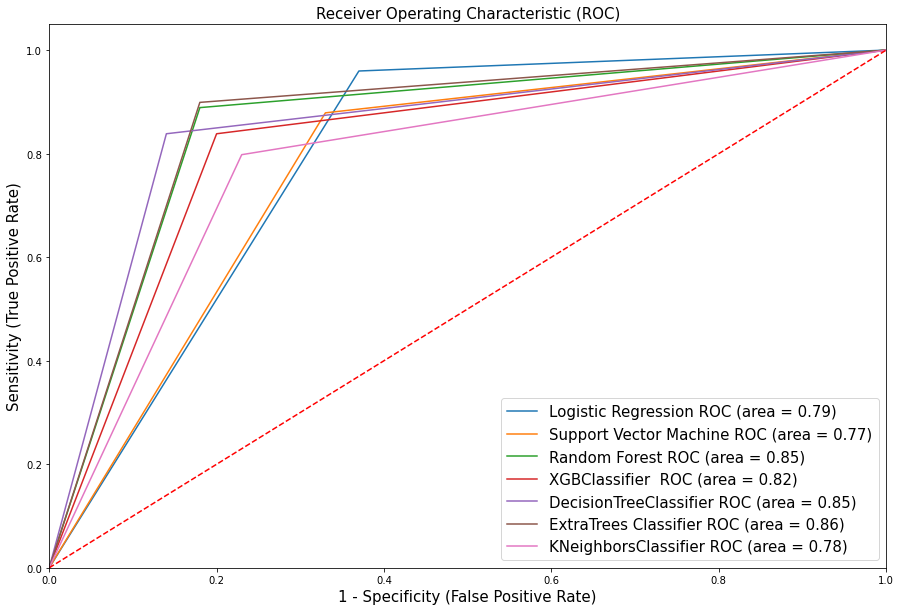

In [59]:
plt.figure(figsize=(15,10))
models = [
{
    'label': 'Logistic Regression',
    'model': lg,
},
{
    'label': 'Support Vector Machine',
    'model': svc,
},
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'XGBClassifier ', 
    'model': xgb,
},
{
    'label': 'DecisionTreeClassifier',
    'model': dt,
},   
{
    'label': 'ExtraTrees Classifier',
    'model': et,
},
{
    'label': 'KNeighborsClassifier',
    'model': knn,
}
]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test)
    fpr,tpr,thersholds=roc_curve(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr,label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)

Getting 86 % of acuracy with ExtraTrees classifier which is best model in all models. 
we will preapare best model with ExtraTrees classifier

# Conclusion::Best Model

In [60]:
import pickle
filename='CensusIncome.pkl'
pickle.dump(et,open(filename,'wb'))

     Actual  Predict
694       0        0
49        1        1
408       1        1
1         0        1
277       1        1
..      ...      ...
59        1        1
623       0        0
547       1        1
540       1        1
230       1        1

[199 rows x 2 columns]


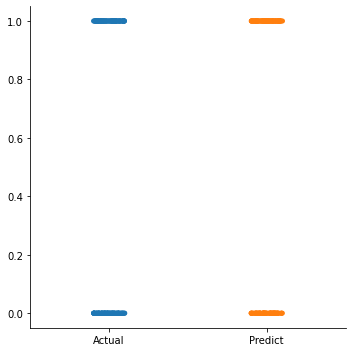

In [61]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=et.predict(x_test)

print(res)
sns.catplot(data=res)